# Nearest neighbour

In [1]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
colormap='binary'
plt.style.use("lecture.mplstyle")


## Generate dataset

We use here a function of scikit-learn to easily generate some test data. Here we pick points from three gaussians with random centers.

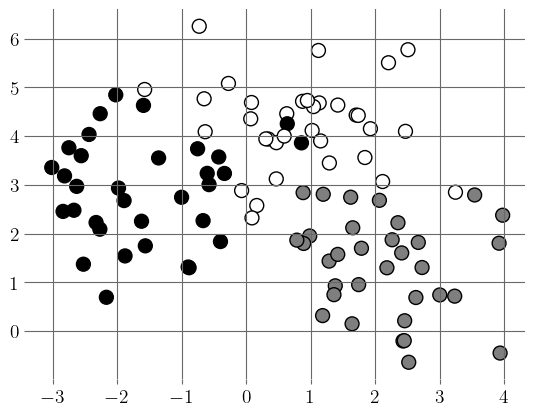

In [2]:
from sklearn.datasets import make_blobs
#X,y = make_blobs(n_samples=200, centers=3, n_features=2,random_state=42)
X,y = make_blobs(n_samples=100, centers=3, n_features=2,random_state=0)

plt.scatter(X[:,0],X[:,1],c=y,edgecolor='black',cmap=colormap)
plt.show()

## Let's try k-nearest neighbour with a couple of different k

First, some code to plot the decision boundary.

In [3]:
resolution=500
L1=np.linspace(np.min(X[:,0])-0.5,np.max(X[:,0])+0.5,num=resolution)
L2=np.linspace(np.min(X[:,1])-0.5,np.max(X[:,1])+0.5,num=resolution)
XX,YY=np.meshgrid(L1,L2)

k-nearest neighbours is implemented in scikit-learn, so it's easy to use.  

In [4]:
from sklearn.neighbors import KNeighborsClassifier
one_nn=KNeighborsClassifier(n_neighbors=1)
one_nn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

Let's set up a short function to plot the decision boundary in order to avoid code repetition.

In [18]:
    
def plot_decision_boundary(nn_classifier,figname):
    Z=nn_classifier.predict(np.array([XX.flatten(),YY.flatten()]).T)
    Z=Z.reshape(XX.shape)
    fig,ax=plt.subplots(figsize=(4,4))
    ax.contour(XX,YY,Z,alpha=0.5,cmap=colormap)
    ax.contourf(XX,YY,Z,alpha=0.3,cmap="binary",levels=2)
    markers=['o','P','v','^','<','>','s','*','X']
    for i,c in enumerate(set(y)):
        XXX=[x for x,y in zip(X[:,0],y) if y==c]
        YYY=[x for x,y in zip(X[:,1],y) if y==c]
        ax.scatter(XXX,YYY,edgecolor='white',c="k",marker=markers[i])
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout()
    plt.savefig(figname,dpi=300)
    plt.show()  

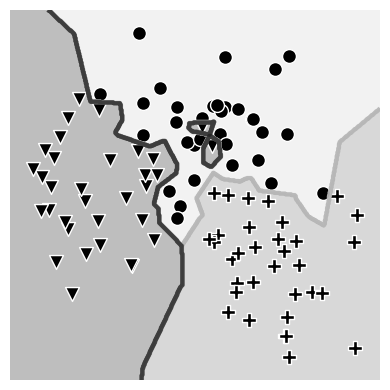

In [19]:
plot_decision_boundary(one_nn,'one_nn.png')

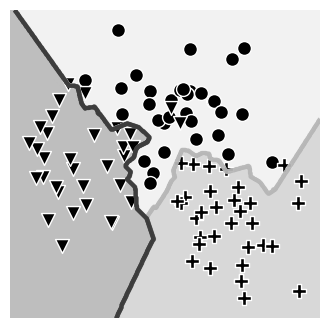

In [13]:
two_nn=KNeighborsClassifier(n_neighbors=2)
two_nn.fit(X,y)
plot_decision_boundary(two_nn,'two_nn.png')

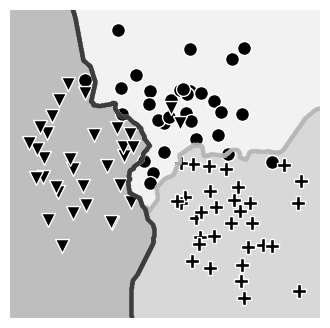

In [14]:
five_nn=KNeighborsClassifier(n_neighbors=5)
five_nn.fit(X,y)
plot_decision_boundary(five_nn,'five_nn.png')

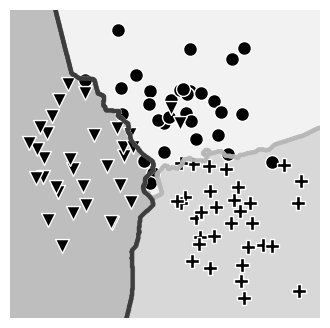

In [15]:
ten_nn=KNeighborsClassifier(n_neighbors=10)
ten_nn.fit(X,y)
plot_decision_boundary(ten_nn,'ten_nn.png')

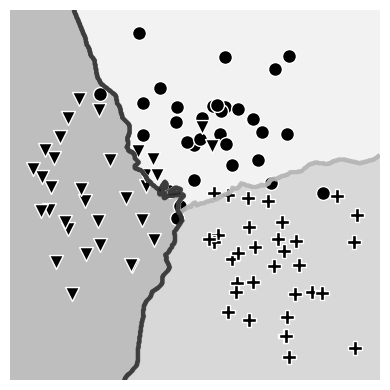

In [20]:
twenty_nn=KNeighborsClassifier(n_neighbors=20)
twenty_nn.fit(X,y)
plot_decision_boundary(twenty_nn,'twenty_nn.png')

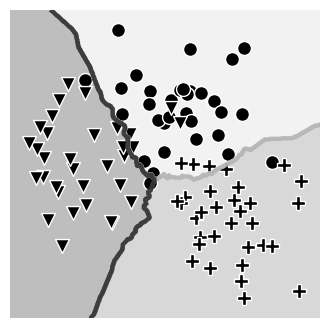

In [17]:
fifty_nn=KNeighborsClassifier(n_neighbors=50)
fifty_nn.fit(X,y)
plot_decision_boundary(fifty_nn,'fifty_nn.png')

With larger $k$ the decision boundary becomes smoother but also starts to miss some local pecularities. 